# 聚类

In [4]:
# 显示beer数据集
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [5]:
X = beer[["calories","sodium","alcohol","cost"]]

## K-means clustering

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2).fit(X)

In [7]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [8]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
9,Budweiser_Light,113,8,3.7,0.40,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
11,Coors_Light,102,15,4.1,0.46,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
8,Miller_Lite,99,10,4.3,0.43,0
19,Schlitz_Light,97,7,4.2,0.47,0
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
4,Heineken,152,11,5.0,0.77,1
3,Kronenbourg,170,7,5.2,0.73,1


In [12]:
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,91.833333,10.166667,3.583333,0.433333
1,150.000000,17.000000,4.521429,0.520714


In [13]:
centers = beer.groupby("cluster").mean().reset_index()

## 聚类评估：轮廓系数（Silhouette Coefficient ）

<img src="1.png" alt="FAO" width="490">

- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

In [18]:
from sklearn import metrics
score = metrics.silhouette_score(X,beer.cluster)
print( score)

0.6917656034079486


In [19]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.4081599013899603,
 0.41282646329875183,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

Text(0, 0.5, 'Sihouette Score')

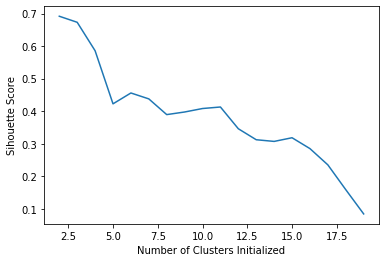

In [22]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

##  DBSCAN clustering

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [29]:
labels = db.labels_

In [32]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0,0
16,Hamms,139,19,4.4,0.43,0,1,0,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,1,0
10,Coors,140,18,4.6,0.44,0,1,0,0
0,Budweiser,144,15,4.7,0.43,0,1,0,0


In [33]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,0.666667
1,99.333333,10.666667,4.200000,0.453333,1.000000,0.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000,1.000000
